In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import seaborn as sns

sns.set(rc={'text.usetex' : True})
sns.set_context("paper", font_scale=2)
sns.set_style("ticks", {'axes.grid': False,
                        'axes.linewidth': 1.5,
                        'legend.frameon':True,
                        'useTex':True})

# Dark Matter Freeze Out
## $g_{*S}$ extracted from plot

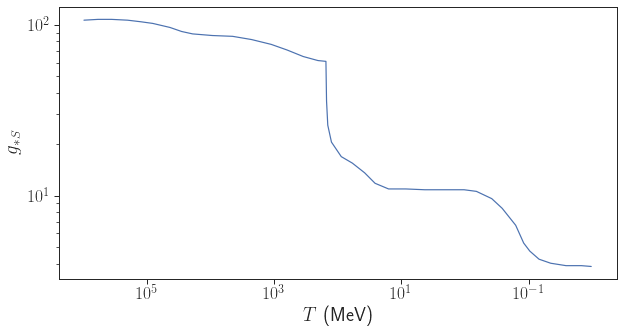

In [23]:
gstar_data = np.genfromtxt('gstar.csv', delimiter=',')
plt.figure(figsize=(10,5))
plt.plot(gstar_data[:,0],gstar_data[:,1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$g_{*S}$')
plt.xlabel(r'$T$ (MeV)')
plt.gca().invert_xaxis()
plt.show()

def gstar(T):
    return np.interp(T,gstar_data[:,0], gstar_data[:,1])

## Converting between $a$ and $T$:

$$a^3g_{*S}(T)T^3=\text{const}$$

In [24]:
def T_to_a(T):
    return (gstar(T_0)/gstar(T))**(1/3)*(T_0/T)
def a_to_T(a):
    func = lambda T: a**3*(gstar(T))*T**3-gstar(T_0)*T_0**3
    T_initial_guess = gstar(T_0)**(1/3)*(T_0/a)
    T_solution = fsolve(func, T_initial_guess)
    return T_solution

# for testing:
T_0 = 2
a_test = T_to_a(100)
a_to_T(a_test)

array([100.])

# Theoretical background

We need to create plots of $\Omega_{\text{DM}}(m_{\text{DM}})$ and  $\Omega_{\text{DM}}(\sigma_{\text{DM-DM}})$

$$\Omega_{\text{DM}}=\frac{\rho_{\text{DM}}}{\rho_{\text{crit}}}$$

Here, $\rho_{\text{DM}}$ is the present value, which can be obtained as follows: 

We calculate $n_{\text{DM}}$ at decoupling, redshift it and then do $\rho_{\text{DM}}= n_{\text{DM},0}m_{\text{DM}}$, where $n_{\text{DM},0}$ can be obtained from the value at decoupling using $n_{\text{DM},0}=n_{\text{DM}}a^{-3}$

For cold dark matter (non-relativistic case):

$$n_{\text{DM}}=g\left(\frac{m_{\text{DM}}T}{2\pi}\right)^{3/2}e^{-m_{\text{DM}}/T}$$

For hot dark matter (relativistic case):

$$n_{\text{DM}}=\frac{\zeta(3)}{\pi^2}gT^3 \text{ for bosons, or }n_{\text{DM}}=\frac34\frac{\zeta(3)}{\pi^2}gT^3 \text{ for fermions.}$$

Let us first assume that the cross section for DM-DM interactions is
$$ \sigma_{\text{DM-DM}}=G_F^2T^2$$

The Hubble parameter, in the radiation dominated universe, is given by:
$$ H(T)=\frac{\pi}{3}\left(\frac{g_*}{10}\right)^{1/2}\frac{T^2}{M_{\text{Pl}}} $$

Using the equipartition theorem, we can compute the velocity of a gas of particles at a temperature $T$:
$$v=\sqrt{\frac{3k_BT}{m_{DM}}}$$

### Instantaneous decoupling

Assuming decoupling was instantaneous, we need to find the freeze-out temperature by equating the interaction rate and the Hubble rate:
$$H(T_{fo})=\Gamma(T_{fo})\Leftrightarrow H(T_{fo})=n(T_{fo})\sigma(T_{fo})v(T_{fo})$$

# Values and units

We will work in natural units. Here are the values that we need:

$G_F=1.1663787 \times 10^{-5} \text{ GeV}^{-2}$

$M_{\text{Pl}}=2.435\times 10^{18}\text{ GeV}$

$k_B=1$

$T_0=0.235 \text{ meV}$

The ranges of $m_{\text{DM}}$ and of $\sigma_{\text{DM-DM}}$ that we need to plot over are:

$m_{\text{DM}}\in [0.1\text{ eV}, 10\text{ keV}] \text{ for hot dark matter}$

$m_{\text{DM}}\in [1\text{ GeV}, 10\text{ TeV}] \text{ for cold dark matter}$

$\sigma_{\text{DM-DM}}\in [G_F\times 10^{-6},G_F\times 10^6]$